In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-data/Iris.csv


In [3]:
iris=pd.read_csv('/kaggle/input/iris-data/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris1= iris.drop(['Species'], axis=1)

In [6]:
iris1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [7]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target = 'Species'

df = iris[features + [target]]

In [13]:
df['Species'] = df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3])

In [17]:
df1=df.drop(['species'], axis=1)
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [18]:
clusters=len(np.unique(target))
print(clusters)

1


In [28]:
values=iris1.values.tolist()

In [41]:
import random as rand
def random_centroids(values, K):    
    centroids = []
    #Place K centroids at random locations
    for i in range(K):
        centroid = values[rand.randint(0, 149)]
        centroids.append(centroid)
    return centroids

In [42]:
def assign_cluster(values, centroids):
    assignments = []

    for data_point in values:
        dist_point_clust = []

        for centroid in centroids:
            dist_clust = np.linalg.norm(np.array(data_point) - np.array(centroid))
            dist_point_clust.append(dist_clust)
        
        assignment = np.argmin(dist_point_clust)
        assignments.append(assignment)

    return assignments  

In [44]:
def new_centroids(values, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        new_cluster = []
        for x in range(len(values)):
                if (assignments[x] == i):
                    new_cluster.append(values[x])
        mean = np.mean(new_cluster, axis=0)
        new_centroids.append(mean)

    return new_centroids

In [50]:
def sse(values, assignments, centroids):
    errors = []
    
    for i in range(len(values)):
        #get assigned centroid for each point
        centroid = centroids[assignments[i]]
    
        #compute the distance (error) between one point and its closest centroid
        error = np.linalg.norm(np.array(values[i]) - np.array(centroid))
        
        #append squared error to the list of error
        errors.append(error**2)
        
    #and sum up all the errors
    sse = sum(errors)
    
    return sse

In [51]:
def kmeans(values,K,max_iter = 100, tol = pow(10,-3) ):  #tol for convergence of algorithm
    it = -1
    all_sse = []
    assignments = []
    
    #Place K centroids at random locations
    centroids = random_centroids(values, K)

   
    #Until algorithm converges
    while (len(all_sse)<=1 or (it < max_iter and np.absolute(all_sse[it] - all_sse[it-1])/all_sse[it-1] >= tol)):
        it += 1
        #Assign all data points to the closest center
        assignments = assign_cluster(values, centroids)
        
        #Compute the new centroids
        centroids = new_centroids(values, centroids, assignments, K)
        
        #Compute SSE
        sse_kmeans = sse(values, assignments, centroids)
        all_sse.append(sse_kmeans)        
        
     
    return (assignments, centroids, all_sse, it)

In [55]:
preds = kmeans(values,K=3)

In [56]:
centroids_x = [preds[1][x][0] for x in range(len(preds[1]))]  
centroids_y = [preds[1][x][1] for x in range(len(preds[1]))] 

In [57]:
x = iris1['SepalLengthCm']
y = iris1['SepalWidthCm']
assignments = result[0]

Text(0, 0.5, 'sepal_length')

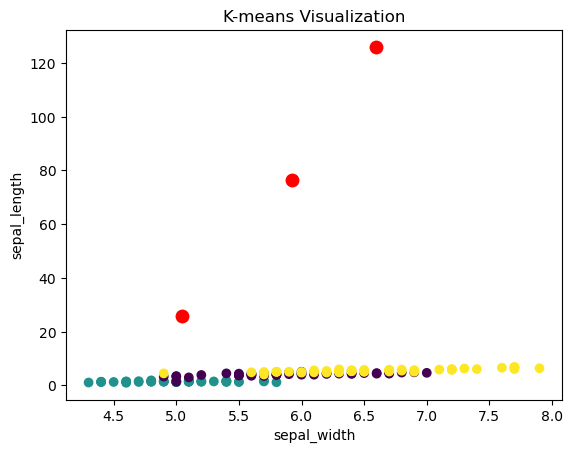

In [68]:
import matplotlib.pyplot as plt
plt.scatter(x, y, c=assignments)
plt.plot(centroids_y,centroids_x, c='white', marker='.', linewidth='0.01', markerfacecolor='red', markersize=22)

plt.title("K-means Visualization")
plt.xlabel("sepal_width")
plt.ylabel("sepal_length")

In [61]:
centroids_x = [preds[1][x][0] for x in range(len(preds[1]))]  
centroids_z = [preds[1][x][2] for x in range(len(preds[1]))] 

In [62]:
x = iris1['SepalLengthCm']
y = iris1['PetalLengthCm']
assignments = result[0]

Text(0, 0.5, 'petal_length')

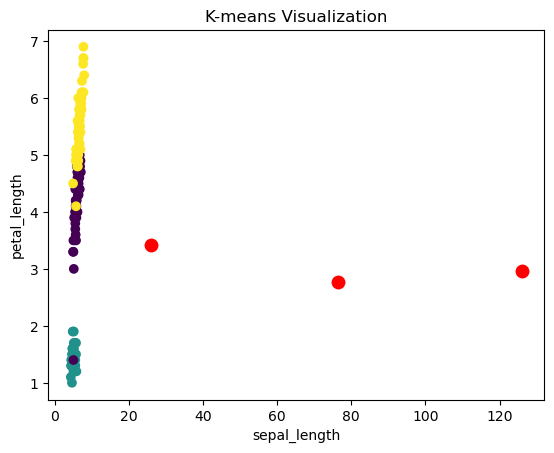

In [67]:
import matplotlib.pyplot as plt
plt.scatter(x, y, c=assignments)
plt.plot(centroids_x,centroids_z, c='white', marker='.', linewidth='0.01', markerfacecolor='red', markersize=22)

plt.title("K-means Visualization")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")